In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy.linalg import norm
from catboost import CatBoostRegressor, Pool
from sklearn.linear_model import LinearRegression

In [217]:
test = [0]*5
dfs = [0]*5

scaler = MinMaxScaler()

X = [0]*5
y = [0]*5

for i, _ in enumerate(test):

    test[i] = []

    with open(f'Data/Map_{i + 1}.txt') as f:

        for line in f.readlines():

            test[i].append(line.split())

    dfs[i] = pd.DataFrame(data=test[i], columns=['x', 'y', 'z']).astype(float)

    # X[i] = scaler.fit_transform(dfs[i].to_numpy()[:, :-1]) # + i # bias 

    X[i] = dfs[i].to_numpy()[:, :-1]

    y[i] = dfs[i].to_numpy()[:, -1]

In [218]:
X_train, X_test, y_train, y_test = [0]*len(X), [0]*len(X), [0]*len(y), [0]*len(y)

for i in range(len(X)):

    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size=0.33, random_state=42) 

In [219]:
points = []

with open('Data/Point_dataset.txt') as f:

    for line in f.readlines():

            points.append(line.split())

pts_df = pd.DataFrame(data=points, columns=['x', 'y', 'z']).astype(float)

X_pts = scaler.fit_transform(pts_df.to_numpy()[:, :-1])

X_pts = pts_df.to_numpy()[:, :-1]

y_pts = pts_df.to_numpy()[:, -1]

In [220]:
# попробовать найти функцию по 5 мапам при этом уменьшая лосс на поинт_датасет лосс рмсе

In [221]:
dfs[1]

,x,y,z
0,68239.21,24467.0,0.11137
1,68251.71,24467.0,0.11094
2,68264.21,24467.0,0.11095
3,68276.71,24467.0,0.11070
4,68289.21,24467.0,0.11088
...,...,...,...
1196490,53239.21,46942.0,0.11056
1196491,53251.71,46942.0,0.11066
1196492,53264.21,46942.0,0.10918
1196493,53276.71,46942.0,0.10950


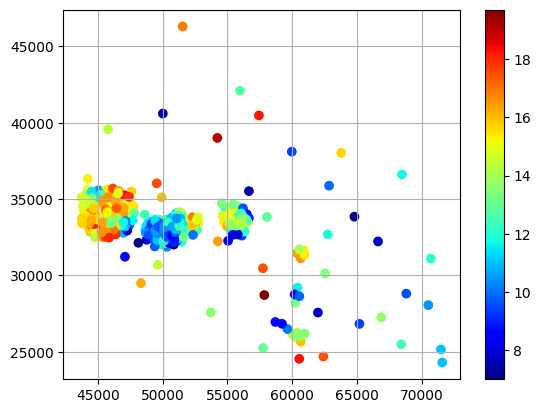

In [222]:
plt.scatter(X_pts[:, 0], X_pts[:, 1], c=y_pts, cmap='jet', vmin=y_pts.min(), vmax=y_pts.max())
plt.colorbar()
plt.grid()
plt.show()

In [223]:
gen_df = dfs[0]

for i in range(1, len(dfs)):

    gen_df = pd.merge(gen_df, dfs[i], on=['x', 'y'], suffixes=[f'_{i}', f'_{i + 1}'])

In [224]:
# теперь надо найти ближайшие точки к птс_дф от ген дф и запулить в новую колонку таргет значения z из птс_дф.

In [225]:
coords = gen_df.loc[:, ['x', 'y']]
coords = coords.sort_values(by=['x', 'y'])
coords = coords.to_numpy()

In [254]:
pts_coords = pts_df.loc[:, ['x', 'y']]
pts_coords = pts_coords.to_numpy()

In [255]:
dists = []
mins = []

for i in range(len(pts_df)):

    dists = norm(pts_df.iloc[i, :-1].to_numpy() - coords, axis=1)

    min_idx = np.argmin(dists)

    mins.append(min_idx)

    pts_coords[i] = coords[min_idx]

In [228]:
pts_coords = pd.DataFrame(data=pts_coords)
pts_coords.columns = ['x', 'y']
pts_coords['target'] = pts_df['z']

In [266]:
train_df = gen_df.loc[gen_df.index.isin(mins)]
train_df

,x,y,z_1,z_2,z_3,z_4,z
13,68401.71,24467.0,0.16025,0.11224,38.46542,4110.1802,1.67928
66,65601.71,24492.0,0.15574,0.10830,37.20178,4174.3618,1.67693
128,66376.71,24492.0,0.15368,0.11354,37.41330,4164.7686,1.67675
140,66526.71,24492.0,0.15138,0.11141,37.53564,4169.8950,1.67712
145,66589.21,24492.0,0.15440,0.11169,38.11042,4149.8569,1.67750
...,...,...,...,...,...,...,...
1103692,49051.71,43067.0,0.17027,0.11461,41.43478,4076.6321,1.68881
1115789,50639.21,43442.0,0.15924,0.11535,41.57830,4137.3452,1.68488
1160310,53989.21,45067.0,0.16481,0.12680,36.59771,4108.3667,1.67540
1165022,54489.21,45267.0,0.15660,0.12242,40.14409,4166.7300,1.67499


In [229]:
dataset = pd.merge(pts_coords, gen_df, on=['x', 'y'])
dataset

,x,y,target,z_1,z_2,z_3,z_4,z
0,44226.71,35592.0,14.974396,0.17579,0.12807,41.38491,4045.6523,1.68053
1,60001.71,26167.0,14.078868,0.14988,0.11870,36.27350,4199.0898,1.67999
2,44301.71,35292.0,14.261570,0.17143,0.13134,41.70690,4072.4370,1.68073
3,52776.71,33442.0,15.347562,0.13929,0.13193,37.22216,4280.4648,1.68286
4,49639.21,30692.0,14.422570,0.14322,0.11874,37.39187,4195.1157,1.67880
...,...,...,...,...,...,...,...,...
436,43864.21,33717.0,15.655493,0.17019,0.11408,41.05634,4067.0313,1.67749
437,65189.21,26842.0,9.374795,0.15552,0.12187,35.60380,4270.1318,1.67122
438,50026.71,40617.0,7.636603,0.16269,0.13639,41.53450,4174.1216,1.67097
439,43839.21,35117.0,14.622497,0.17806,0.11942,41.85337,4028.5405,1.67880


In [410]:
X = dataset.drop(columns=['target', 'x', 'y'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.005, 
                                                    random_state=42)


# X = res_df.iloc[:, :2].to_numpy()
# y = res_df.iloc[:, -1].to_numpy()

# regr = LinearRegression()
# regr = regr.fit(X, y)
# lin_preds = regr.predict(X)
X

,z_1,z_2,z_3,z_4,z
0,0.17579,0.12807,41.38491,4045.6523,1.68053
1,0.14988,0.11870,36.27350,4199.0898,1.67999
2,0.17143,0.13134,41.70690,4072.4370,1.68073
3,0.13929,0.13193,37.22216,4280.4648,1.68286
4,0.14322,0.11874,37.39187,4195.1157,1.67880
...,...,...,...,...,...
436,0.17019,0.11408,41.05634,4067.0313,1.67749
437,0.15552,0.12187,35.60380,4270.1318,1.67122
438,0.16269,0.13639,41.53450,4174.1216,1.67097
439,0.17806,0.11942,41.85337,4028.5405,1.67880


In [411]:
model = CatBoostRegressor(iterations=10000, 
                          depth=6, 
                          learning_rate=0.03, 
                          loss_function='RMSE',
                          l2_leaf_reg=0.2
                        )

lernData = model.fit(X_train, y_train, plot=False)

0:	learn: 2.7504331	total: 1.71ms	remaining: 17.1s
1:	learn: 2.6928821	total: 3.5ms	remaining: 17.5s
2:	learn: 2.6336871	total: 5.26ms	remaining: 17.5s
3:	learn: 2.5816587	total: 6.88ms	remaining: 17.2s
4:	learn: 2.5311423	total: 8.98ms	remaining: 17.9s
5:	learn: 2.4778053	total: 10.5ms	remaining: 17.4s
6:	learn: 2.4294303	total: 12.1ms	remaining: 17.3s
7:	learn: 2.3788019	total: 13.8ms	remaining: 17.2s
8:	learn: 2.3299367	total: 15.3ms	remaining: 16.9s
9:	learn: 2.2818345	total: 16.8ms	remaining: 16.7s
10:	learn: 2.2344445	total: 18.6ms	remaining: 16.9s
11:	learn: 2.1909525	total: 23.1ms	remaining: 19.3s
12:	learn: 2.1497709	total: 25.3ms	remaining: 19.5s
13:	learn: 2.1105668	total: 27.3ms	remaining: 19.5s
14:	learn: 2.0687117	total: 28.9ms	remaining: 19.2s
15:	learn: 2.0286821	total: 30.5ms	remaining: 19s
16:	learn: 1.9908528	total: 34.2ms	remaining: 20.1s
17:	learn: 1.9567110	total: 36.3ms	remaining: 20.1s
18:	learn: 1.9235683	total: 38.3ms	remaining: 20.1s
19:	learn: 1.8905423	tota

In [412]:
from sklearn.metrics import mean_squared_error as mse

preds = model.predict(X_test.values)
a = np.sqrt(mse(preds, y_test.values))
a

0.9807977464453431

In [413]:
preds = model.predict(gen_df.drop(columns=['x', 'y']).to_numpy())
preds

array([15.51823742, 15.39775062, 15.41118192, ..., 14.97106786,
       14.8319557 , 15.4505378 ])

In [414]:
pred_vals = model.predict(dataset.drop(columns=['target', 'x', 'y']).to_numpy())
acc = np.sqrt(mse(pred_vals, dataset['target'].to_numpy()))
acc

0.08090462006616629

Text(0.5, 0, 'CatBoost Feature Importance')

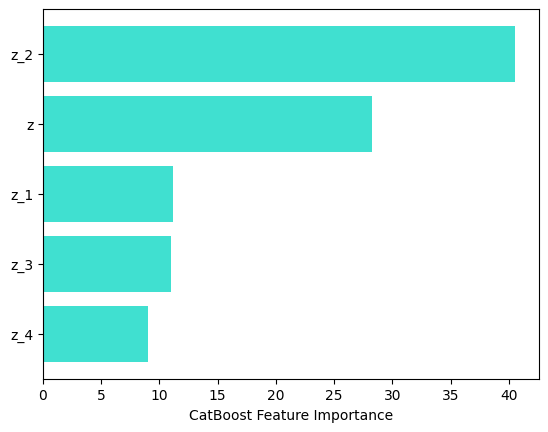

In [415]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

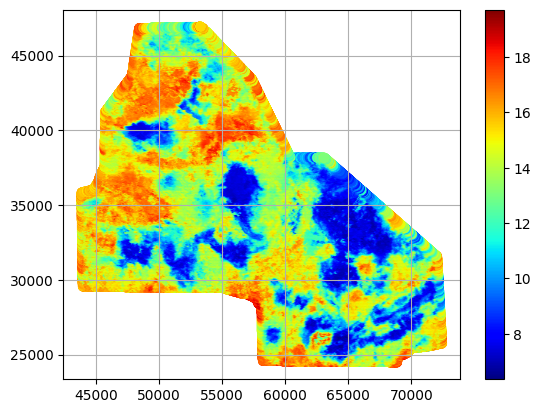

In [416]:
plt.scatter(gen_df.iloc[:, 0].to_numpy(), gen_df.iloc[:, 1].to_numpy(), c=preds, cmap='jet', vmin=preds.min(), vmax=preds.max())
plt.colorbar()
plt.grid()
plt.show()

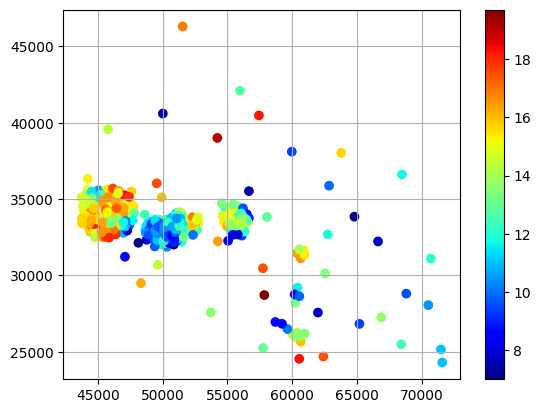

In [350]:
plt.scatter(X_pts[:, 0], X_pts[:, 1], c=y_pts, cmap='jet', vmin=y_pts.min(), vmax=y_pts.max())
plt.colorbar()
plt.grid()
plt.show()

In [250]:
pts_df

,x,y,z
0,44222.21,35600.90,14.974396
1,60003.40,26172.72,14.078868
2,44300.61,35291.79,14.261570
3,52776.47,33453.18,15.347562
4,49636.39,30697.34,14.422570
...,...,...,...
436,65193.40,26832.74,9.374795
437,50022.04,40606.42,7.636603
438,43745.18,35114.25,14.622497
439,71483.43,25152.76,11.014532


In [417]:
test = []
with open('Data/Result_schedule.txt') as f:
    for line in f.readlines():
        test.append(line.split())

dfRes = pd.DataFrame(data=test)
dfRes = dfRes.astype(float)
dfRes.columns = ['x', 'y', 'z']
dfRes

,x,y,z
0,68239.21,24467.0,NaN
1,68251.71,24467.0,NaN
2,68264.21,24467.0,NaN
3,68276.71,24467.0,NaN
4,68289.21,24467.0,NaN
...,...,...,...
1196585,53264.21,46942.0,NaN
1196586,53276.71,46942.0,NaN
1196587,53289.21,46942.0,NaN
1196588,53301.71,46942.0,NaN


In [418]:
dfRes1 = dfRes.copy()

In [419]:
newPdToSend = gen_df[['x','y']]
newPdToSend['z'] = preds
newPdToSend

C:\Users\maksi\AppData\Local\Temp\ipykernel_20188\1967791472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newPdToSend['z'] = preds


,x,y,z
0,68239.21,24467.0,15.518237
1,68251.71,24467.0,15.397751
2,68264.21,24467.0,15.411182
3,68276.71,24467.0,15.268335
4,68289.21,24467.0,15.370284
...,...,...,...
1196458,53239.21,46942.0,16.319607
1196459,53251.71,46942.0,14.972358
1196460,53264.21,46942.0,14.971068
1196461,53276.71,46942.0,14.831956


In [420]:
dfRes = pd.merge(dfRes1, newPdToSend, on=['x', 'y'], how='left')
dfRes.fillna(dfRes['z_y'].median(), inplace=True)
dfRes.drop(columns=['z_x'], inplace=True)
dfRes.rename(columns={'z_y':'z'}, inplace=True)
dfRes

,x,y,z
0,68239.21,24467.0,15.518237
1,68251.71,24467.0,15.397751
2,68264.21,24467.0,15.411182
3,68276.71,24467.0,15.268335
4,68289.21,24467.0,15.370284
...,...,...,...
1196585,53264.21,46942.0,14.971068
1196586,53276.71,46942.0,14.831956
1196587,53289.21,46942.0,15.450538
1196588,53301.71,46942.0,13.773940


In [421]:
from main import export_dataset_to_file

In [422]:
export_dataset_to_file(dfRes)

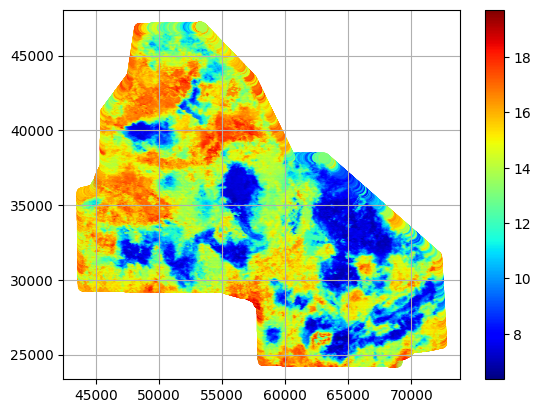

In [423]:
plt.scatter(dfRes['x'].to_numpy(), dfRes['y'].to_numpy(), c=dfRes['z'].to_numpy(), cmap='jet', vmin=dfRes['z'].to_numpy().min(), vmax=dfRes['z'].to_numpy().max())
plt.grid()
plt.colorbar()
plt.show()

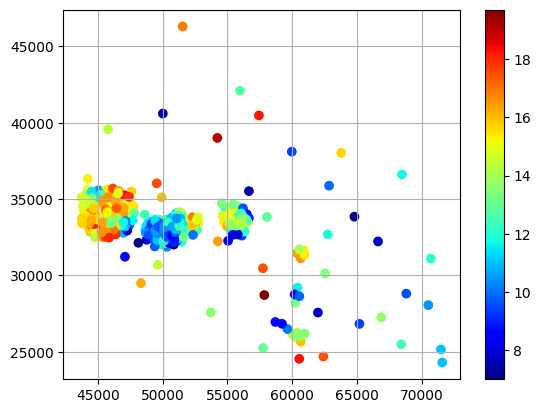

In [ ]:
plt.scatter(X_pts[:, 0], X_pts[:, 1], c=y_pts, cmap='jet', vmin=y_pts.min(), vmax=y_pts.max())
plt.colorbar()
plt.grid()
plt.show()